# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning) # os gráficos que usam sns.lineplot apresentavam warnings que só poluiam o código

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

1.

In [3]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)

modelo = sm.OLS(y, X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           2.64e-20
Time:                        09:24:24   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Avaliando os valores de P>|t|, as variáveis *sex*, *smoker* e *time* não são estatísticamente significativas, portanto serão removidas do modelo

2 e 3.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           5.02e-23
Time:                        09:24:24   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

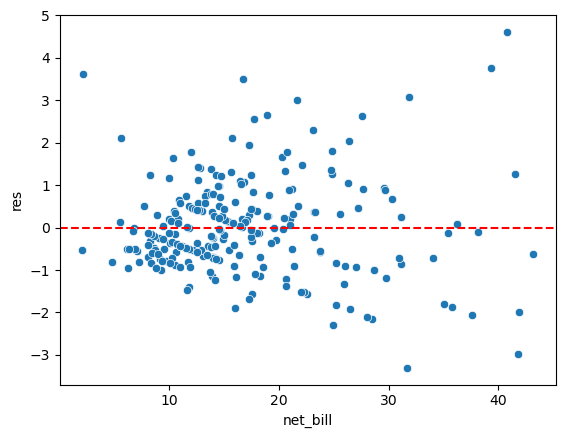

In [4]:
y, X = patsy.dmatrices('tip ~  net_bill', tips)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

tips['res'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

4.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           4.40e-20
Time:                        09:24:24   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

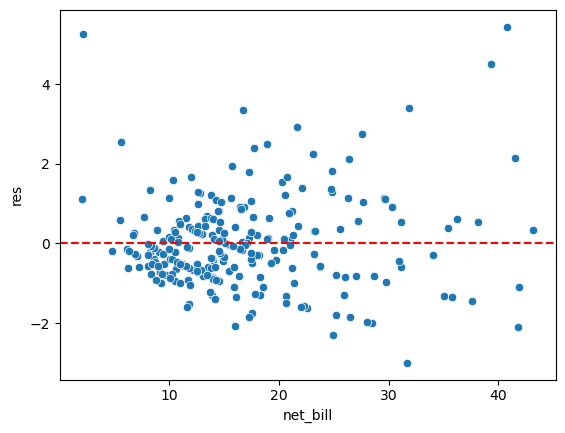

In [5]:
y, X = patsy.dmatrices('tip ~  np.log(net_bill)', tips)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

tips['res'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           1.47e-20
Time:                        09:24:24   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.25

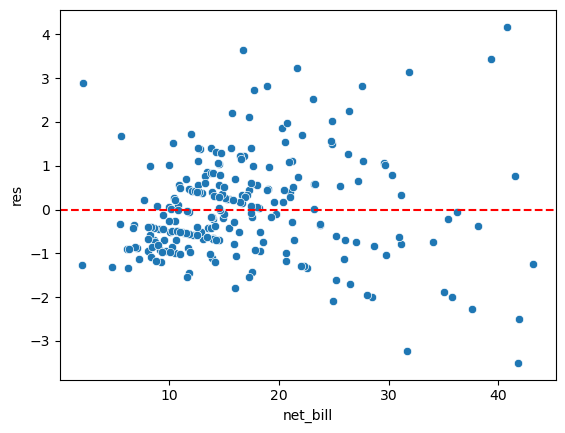

In [6]:
y, X = patsy.dmatrices('tip ~  np.power(net_bill,2)', tips)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

tips['res'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

O melhor modelo parece ser aquele que usa diretamente o valor de *net_bill* para predizer *tip*, pois apresenta o maior valor de R-quadrado

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip_pct```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip_pct``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [7]:
tips_filtrado = tips[tips['tip_pct']<.5].copy()

1.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     17.48
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           1.38e-12
Time:                        09:24:25   Log-Likelihood:                -80.880
No. Observations:                 242   AIC:                             171.8
Df Residuals:                     237   BIC:                             189.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.3700      0.074    -18.

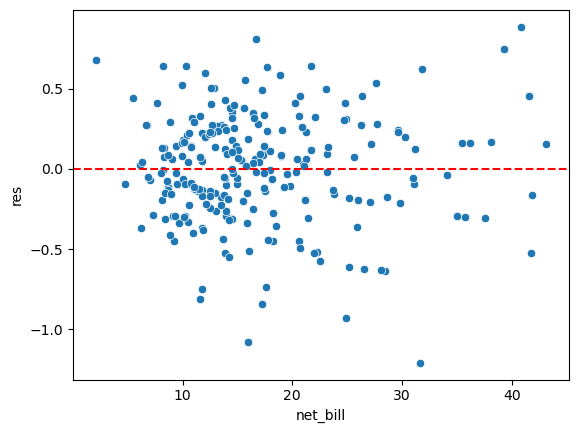

In [8]:
y, X = patsy.dmatrices('np.log(tip_pct) ~ sex + smoker + time + net_bill', tips_filtrado)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

tips_filtrado['res'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips_filtrado) # removendo outliers do gráfico
plt.axhline(y=0, color='r', linestyle='--')

Novamente,  os valores de P>|t| para as variáveis *sex*, *smoker* e *time* são altos, o que indica baixa significância estatística no modelo atual, portanto serão removidas

2 e 3.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           5.70e-15
Time:                        09:24:25   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.0

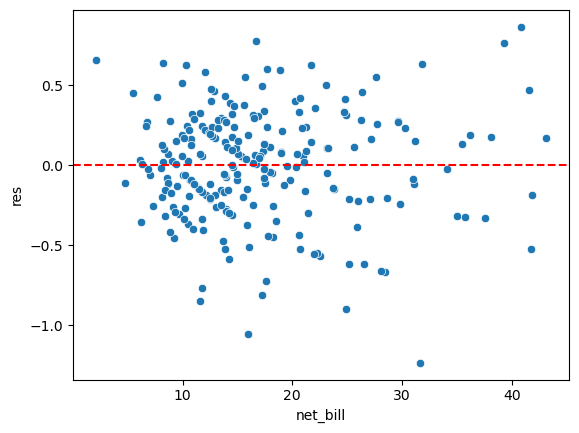

In [9]:
y, X = patsy.dmatrices('np.log(tip_pct) ~ net_bill', tips_filtrado)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

tips_filtrado['res'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips_filtrado)
plt.axhline(y=0, color='r', linestyle='--')

4.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     68.11
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           1.03e-14
Time:                        09:24:25   Log-Likelihood:                 336.29
No. Observations:                 242   AIC:                            -668.6
Df Residuals:                     240   BIC:                            -661.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3818      0.023  

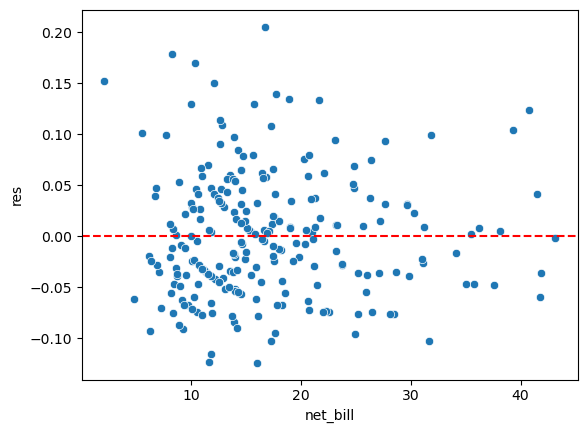

In [10]:
y, X = patsy.dmatrices('tip_pct ~ np.log(net_bill)', tips_filtrado)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

tips_filtrado['res'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips_filtrado)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           1.09e-12
Time:                        09:24:25   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.29

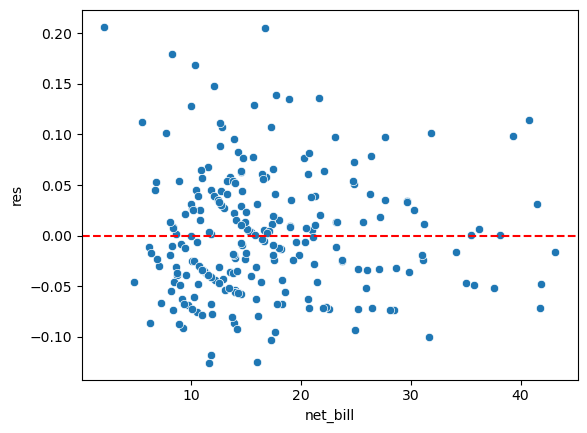

In [11]:
y, X = patsy.dmatrices('tip_pct  ~ net_bill + np.power(net_bill,2)', tips_filtrado)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

tips_filtrado['res'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips_filtrado)
plt.axhline(y=0, color='r', linestyle='--')

5.

In [12]:
tips_filtrado['pred_tip_pct'] = np.exp(modelo.fittedvalues)

tips_filtrado[['tip_pct', 'pred_tip_pct']].corr().iloc[0,1]**2

0.2064817380832622

O melhor coeficiente de determinação é do modelo do item 1, com coeficiente de determinação R-quadrado 0.228

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

In [13]:
df = pd.read_csv("previsao_de_renda.csv")
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

Escolhendo 1000 observações de maneira aleatória na base de dados e preenchendo os valores nulos com a média

In [14]:
df_sample = df[['renda', 'tempo_emprego']].sample(n=1000, random_state=42).fillna(df['tempo_emprego'].mean()).reset_index(drop=True)
df_sample

,renda,tempo_emprego
0,3479.22,7.722635
1,4867.69,0.424658
2,23610.27,41.200000
3,707.96,1.200000
4,4349.39,4.468493
...,...,...
995,3098.15,7.722635
996,7945.86,6.852055
997,667.77,7.722635
998,6475.35,4.805479


1.

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           4.59e-41
Time:                        09:24:25   Log-Likelihood:                -10169.
No. Observations:                1000   AIC:                         2.034e+04
Df Residuals:                     998   BIC:                         2.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2176.1567    326.291      6.669

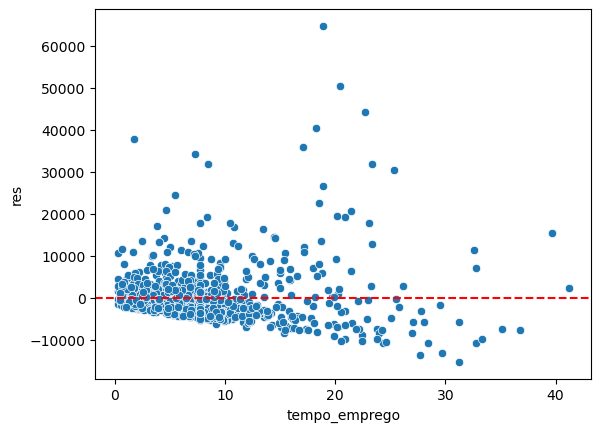

In [15]:
y, X = patsy.dmatrices('renda ~ tempo_emprego', df_sample)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

df_sample['res'] = modelo.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df_sample)
plt.axhline(y=0, color='r', linestyle='--')

Vou tentar log e polinomial

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     183.5
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           1.71e-38
Time:                        09:24:26   Log-Likelihood:                -1213.6
No. Observations:                1000   AIC:                             2431.
Df Residuals:                     998   BIC:                             2441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.7986      0.042    185.265

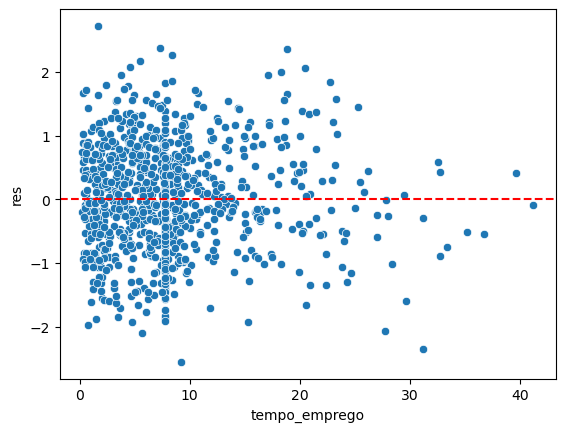

In [16]:
y, X = patsy.dmatrices('np.log(renda) ~ tempo_emprego', df_sample)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

df_sample['res'] = modelo.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df_sample)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:         np.sqrt(renda)   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     217.9
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           9.52e-45
Time:                        09:24:26   Log-Likelihood:                -4829.8
No. Observations:                1000   AIC:                             9664.
Df Residuals:                     998   BIC:                             9673.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        50.1623      1.566     32.037

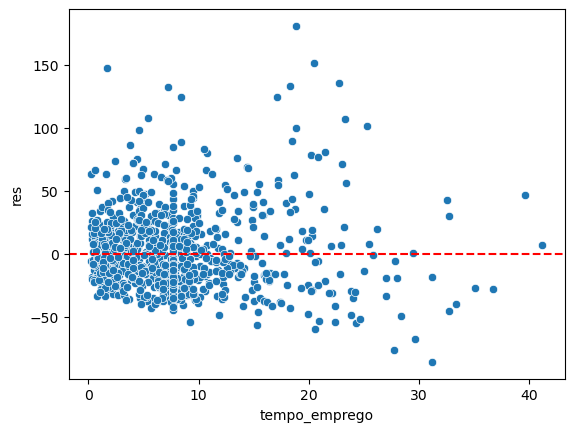

In [17]:
y, X = patsy.dmatrices('np.sqrt(renda) ~ tempo_emprego', df_sample)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

df_sample['res'] = modelo.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df_sample)
plt.axhline(y=0, color='r', linestyle='--')

Usei dois métodos de ajuste da variável resposta no modelo, um com log e outro com polinomial. Ambos apresentam padrão semelhante nos resíduos, tendo o segundo maior valor de coeficiente de determinação. O segundo modelo parece ser mais bem ajustado, mas ainda está longe de mostrar ausência de correlação na distribuição dos resíduos em relação à variável explicativa

3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

3.

Sample

In [18]:
df_sample_all_columns = df.sample(n=1000, random_state=42).fillna(df['tempo_emprego'].mean()).reset_index(drop=True).iloc[:, 1:].drop(columns='id_cliente') # a coluna Unnamed é um resíduo do arquivo .csv
df_sample_all_columns

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-12-01,F,False,True,0,Pensionista,Secundário,Casado,Casa,61,7.722635,2.0,3479.22
1,2015-07-01,M,True,True,0,Assalariado,Secundário,Casado,Casa,28,0.424658,2.0,4867.69
2,2016-02-01,F,True,True,0,Servidor público,Superior completo,Solteiro,Casa,60,41.200000,1.0,23610.27
3,2015-01-01,F,False,True,0,Empresário,Superior completo,Solteiro,Casa,45,1.200000,1.0,707.96
4,2015-06-01,M,True,False,2,Assalariado,Superior completo,Casado,Casa,34,4.468493,4.0,4349.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2015-11-01,F,False,True,0,Pensionista,Secundário,Solteiro,Casa,55,7.722635,1.0,3098.15
996,2016-02-01,M,True,True,1,Assalariado,Superior incompleto,Casado,Casa,41,6.852055,3.0,7945.86
997,2016-02-01,F,False,True,0,Pensionista,Secundário,Casado,Casa,62,7.722635,2.0,667.77
998,2015-01-01,M,True,True,0,Assalariado,Secundário,Casado,Casa,55,4.805479,2.0,6475.35


Regressão múltipla

In [19]:
y, X = patsy.dmatrices('''
                       np.sqrt(renda) ~ qt_pessoas_residencia
                       + tempo_emprego 
                       + idade 
                       + tipo_residencia 
                       + estado_civil 
                       + educacao 
                       + tipo_renda 
                       + qtd_filhos 
                       + posse_de_imovel 
                       + posse_de_veiculo 
                       + sexo 
                       + data_ref                       
                       ''', data=df_sample_all_columns)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:         np.sqrt(renda)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     18.40
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           6.10e-89
Time:                        09:24:26   Log-Likelihood:                -4655.2
No. Observations:                1000   AIC:                             9388.
Df Residuals:                     961   BIC:                             9580.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Aparentemente as variáveis estatísticamente significativas são *sexo*, *tempo_emprego* e *idade*. Removerei as demais do modelo

4.

In [20]:
y, X = patsy.dmatrices('np.sqrt(renda) ~ tempo_emprego + idade + sexo', data=df_sample_all_columns)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:         np.sqrt(renda)   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     209.9
Date:                Tue, 11 Jun 2024   Prob (F-statistic):          1.68e-105
Time:                        09:24:26   Log-Likelihood:                -4683.6
No. Observations:                1000   AIC:                             9375.
Df Residuals:                     996   BIC:                             9395.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        38.9636      3.721     10.470

O novo modelo mudou a importância estatística da variável *idade*. Vou removê-la também

In [21]:
y, X = patsy.dmatrices('np.sqrt(renda) ~ tempo_emprego + sexo', data=df_sample_all_columns)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:         np.sqrt(renda)   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     314.4
Date:                Tue, 11 Jun 2024   Prob (F-statistic):          1.36e-106
Time:                        09:24:26   Log-Likelihood:                -4684.1
No. Observations:                1000   AIC:                             9374.
Df Residuals:                     997   BIC:                             9389.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        35.6471      1.568     22.738

O modelo parece ter melhorado, pois as variáveis explicativas restantes apresentam P>|t| baixo, o que indica que são variáveis significativas para o modelo

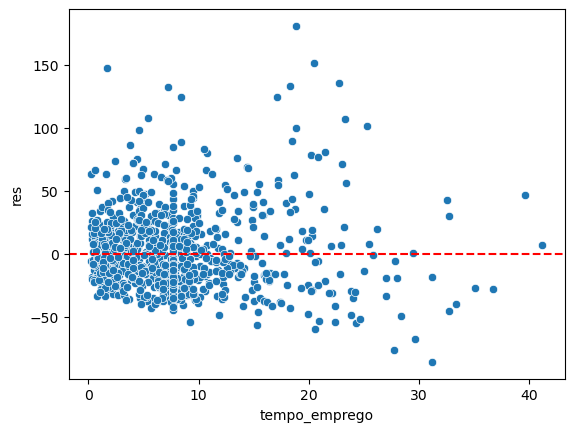

In [22]:
df_sample_all_columns['res'] = modelo.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df_sample)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='sexo', ylabel='res'>

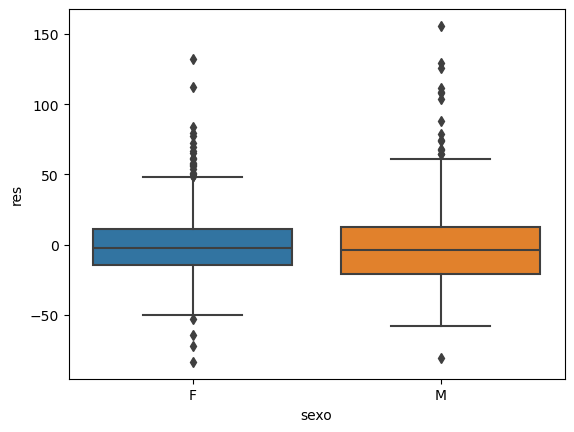

In [23]:
sns.boxplot(x='sexo', y='res', data=df_sample_all_columns)

A distribuição dos resíduos é semelhante nas categorias de *sexo* e não tão semelhantes abaixo e acima da reta *y=0* para *tempo_emprego*. Com as ferramentas abordadas até aqui, o modelo parece bem ajustado